# Introduction to Perceptron
## Perceptron Classifier Implementation
Following code from Raschka's book.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Testando o classificador Perceptron

In [9]:
"""Dados de Treinamento """
X = np.array([[1,1],[2,2],[3,3]])
y = np.array([1,1,-1])

"""Criando objeto Perceptron"""
ppn = Perceptron(eta=0.1, n_iter=100)

"""Treinando o modelo"""
ppn.fit(X, y)

"""Testando modelo treinado """
X_newdata = np.array([[4,4],[2,2],[3,3]])
print("Resultado da Predição",ppn.predict(X_newdata));

Resultado da Predição [-1  1 -1]


## Questao 1 - Implemente uma função para calcular a acurácia do modelo

In [136]:
# our code
def accuracy(predicted , correct):
    size = len(predicted)
    return 1 - (np.sum(np.abs((predicted+1)*1/2 - (correct+1)*1/2 ))/size)

accuracy(ppn.predict(X_newdata), y)

0.6666666666666667

## Questao 2 - Implemente um método de validação cruzada para testar 

In [94]:
accuracy((np.array([1,-1,1,-1,1,1])+1)*1/2,(np.array([-1,-1,1,1,-1,1])+1)*1/2)

#np.abs(np.array([1,-1,1,-1,1,1]) - np.array([-1,-1,1,1,-1,1]))
#(np.array([1,-1,1,-1,1,1])+1)*1/2

0.5

## Teste o classificador usando um conjunto de dados linearmente separável e outro não linearmente separável
### Sugestão: crie datasets sintéticos com apenas dois atributos para voce poder visualizar a separação das classes

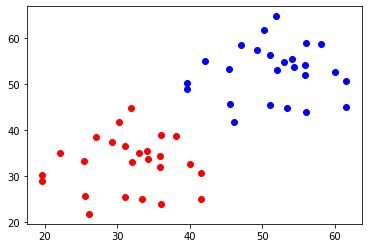

In [5]:
spdt_one = np.random.normal(30, size=(25,2), scale=5.95)
spdt_two = spdt_one+20
plt.plot(spdt_one[:,0], spdt_one[:,1], 'ro')
plt.plot(spdt_two[:,0], spdt_two[:,1], 'bo')

In [191]:
# Merging data
spdt_set = np.concatenate((spdt_one, spdt_two), axis=0).astype(int)
spdt_y = np.concatenate( (np.ones(25), np.ones(25)*-1),axis = 0)

# Shuffling and spliting data
paired = list(zip(spdt_set, spdt_y))
np.random.shuffle(paired)

spdt_trainset = paired[:40]
spdt_testset = paired[40:]

spdt_trsX, spdt_trsY = zip(*spdt_trainset)
spdt_tssX, spdt_tssY = zip(*spdt_testset)

#print(type(spdt_trsX),type(spdt_trsY),"\n\n",spdt_tssX,spdt_tssY)

# Train and Evaluate our model
ppn2 = Perceptron(n_iter=100)
ppn2.fit(np.array(spdt_trsX),np.array(spdt_trsY))
accuracy(ppn2.predict(np.array(spdt_tssX)), np.array(spdt_tssY))
#ppn2.predict(np.array(spdt_tssX))

# plot data and line

0.7

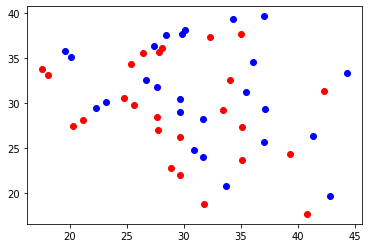

In [7]:
nsdt_one = np.random.normal(30, size=(25,2), scale=5.95)
nsdt_two = nsdt_one+2

plt.plot(nsdt_one[:,0], nsdt_one[:,1], 'ro')
plt.plot(nsdt_two[:,0], nsdt_two[:,1], 'bo')

In [252]:
nsdt_set = np.concatenate((nsdt_one, nsdt_two), axis=0).astype(int)
nsdt_y = np.concatenate( (np.ones(25), np.ones(25)*-1),axis = 0)

# Shuffling and spliting data
paired = list(zip(nsdt_set, nsdt_y))
np.random.shuffle(paired)

nsdt_trainset = paired[:40]
nsdt_testset = paired[40:]

nsdt_trsX, nsdt_trsY = zip(*nsdt_trainset)
nsdt_tssX, nsdt_tssY = zip(*nsdt_testset)

# Train and Evaluate our model
ppn3 = Perceptron(n_iter=100)
ppn3.fit(np.array(nsdt_trsX),np.array(nsdt_trsY))
accuracy(ppn3.predict(np.array(nsdt_tssX)), np.array(nsdt_tssY))

0.5

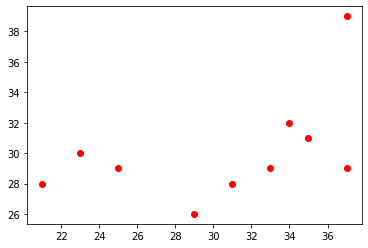

In [255]:
plt.plot(np.array(nsdt_tssX)[:,0], np.array(nsdt_tssX)[:,1], 'ro')
#plt.plot(ppn3.w_, 'bo')

## Questao 3 - Treine um classificador perceptron para os dados de seu estudo de caso